Importing Required Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the csv file

In [21]:
df=pd.read_csv("/content/kidney_dataset.csv")

Checking the basic info of the data set

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


In [23]:
df.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


Checking the percentage of null values

In [24]:
df.isna().sum()/len(df)*100

,0
Creatinine,0.00
BUN,0.00
GFR,0.00
Urine_Output,0.00
Diabetes,0.00
Hypertension,0.00
Age,0.00
Protein_in_Urine,0.00
Water_Intake,0.00
Medication,59.74


Dropping the more null values column

In [25]:
df=df.drop(columns="Medication")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 390.8 KB


Defined a function to check the outliers

In [27]:
def box_plots(df):
  for i in df.columns:
    if df[i].dtypes!="O":
      sns.boxplot(df[i])
      plt.title(i)
      plt.show()

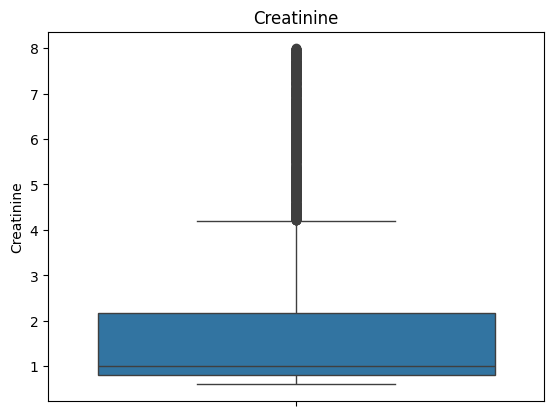

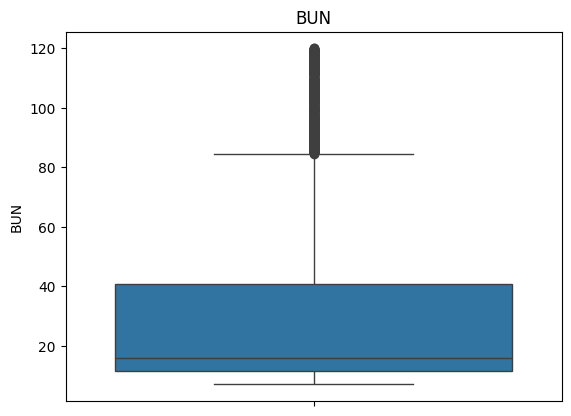

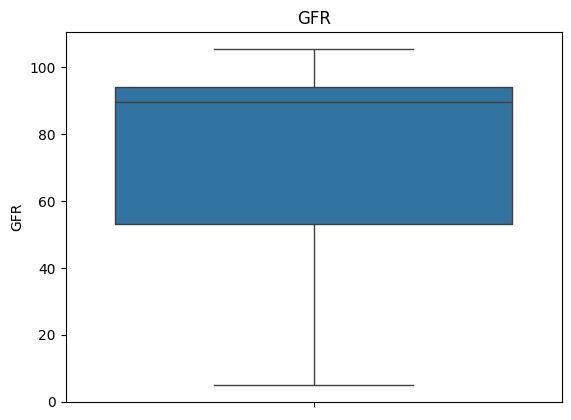

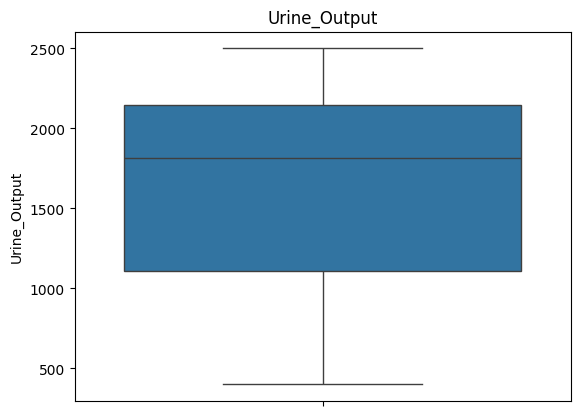

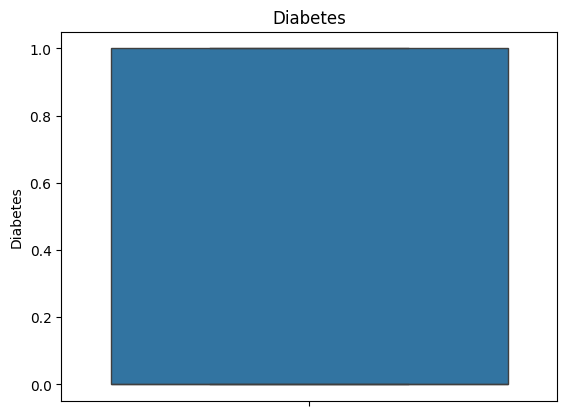

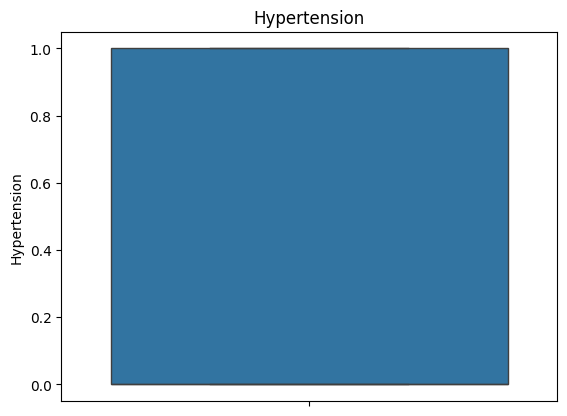

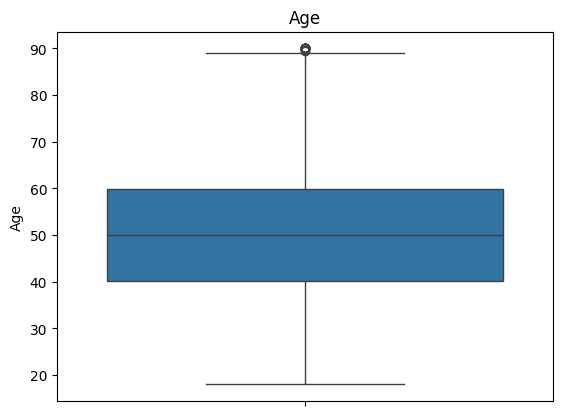

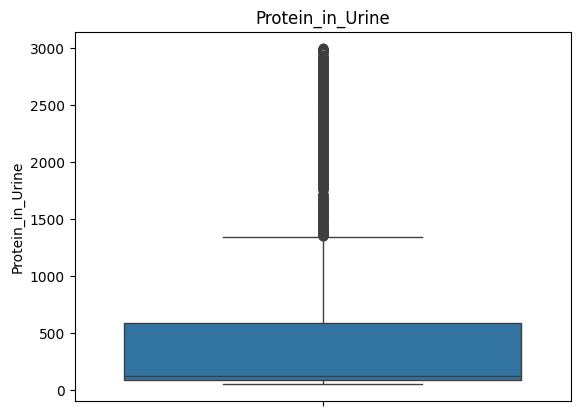

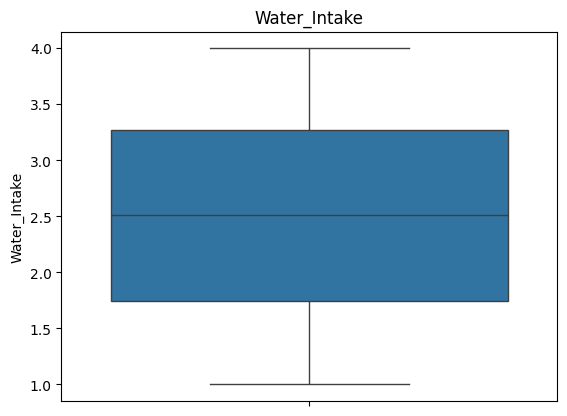

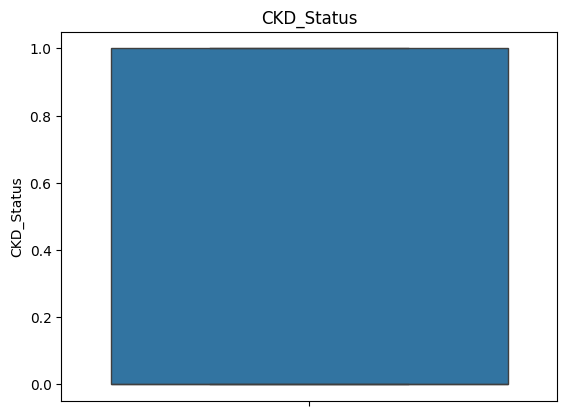

In [28]:
box_plots(df)

Removed unwanted column due to relationship with target column

In [29]:
df=df.drop(columns="CKD_Status")

Defined a function to check the plots following normal distribution or not

In [30]:
def kde_plots(df):
  for i in df.columns:
    if df[i].dtypes!="O":
      sns.kdeplot(df[i])
      plt.title(i)
      plt.show()

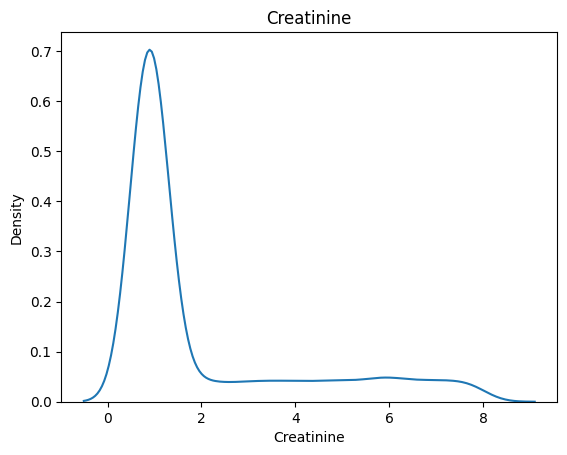

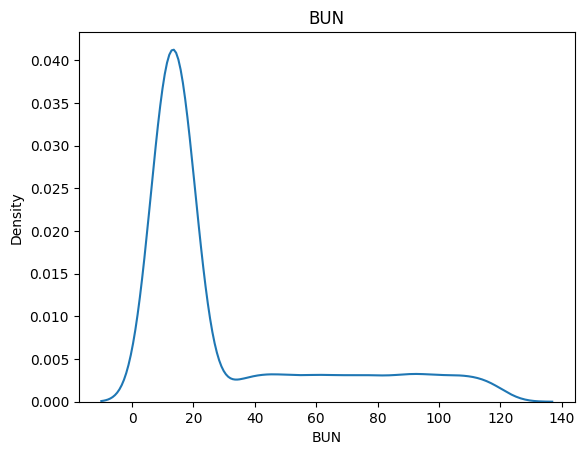

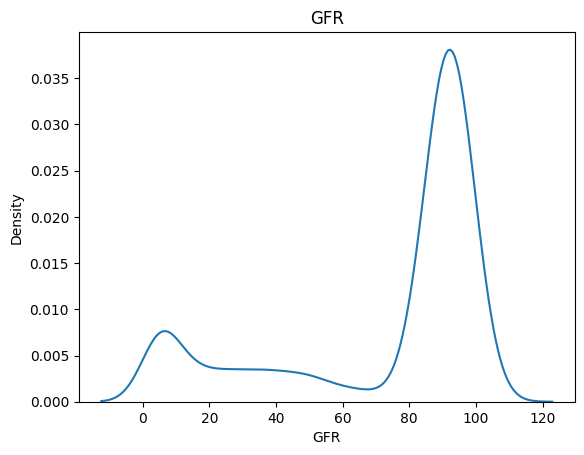

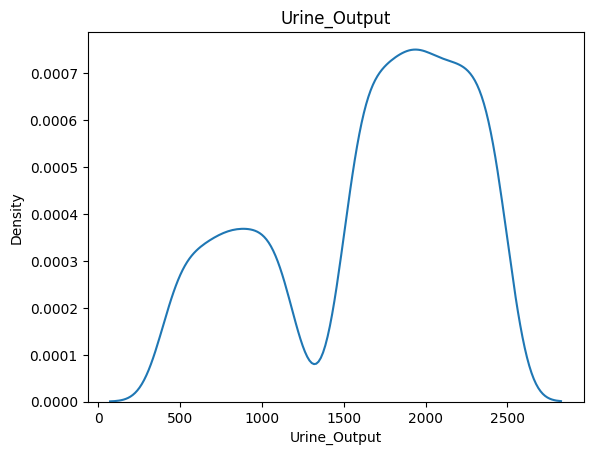

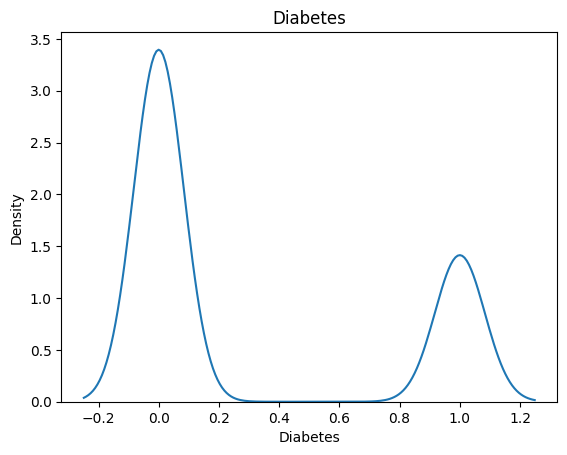

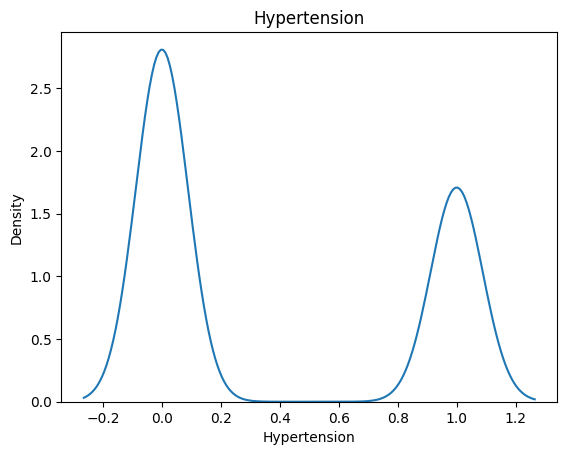

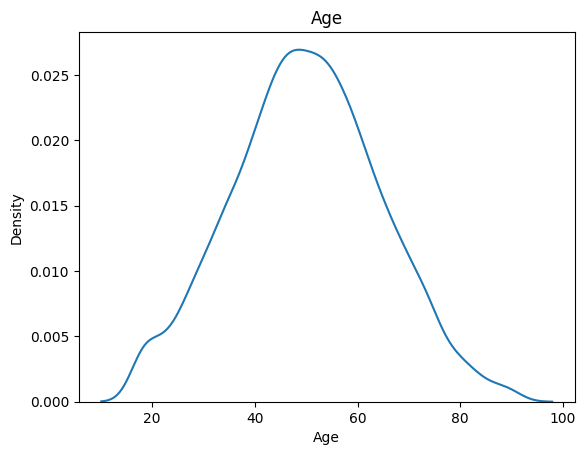

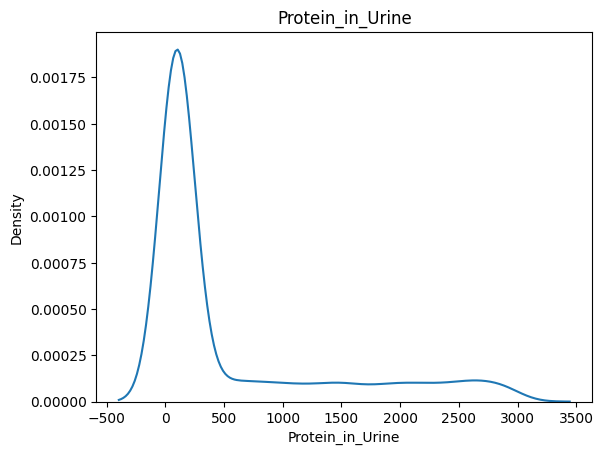

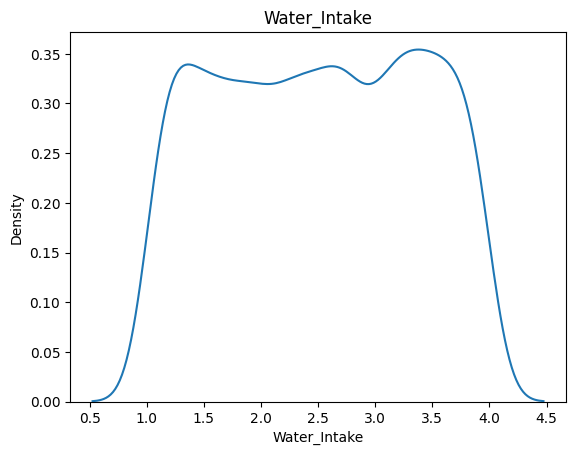

In [31]:
kde_plots(df)

Assigning input columns to one variable and target column to another variable

In [38]:
x=df.drop(columns="GFR")
y=df["GFR"]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 351.7 KB


Splitting the data into train and test data

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Printing the shape of the train and test data

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 8)
(4000,)
(1000, 8)
(1000,)


In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4227 to 860
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        4000 non-null   float64
 1   BUN               4000 non-null   float64
 2   Urine_Output      4000 non-null   float64
 3   Diabetes          4000 non-null   int64  
 4   Hypertension      4000 non-null   int64  
 5   Age               4000 non-null   float64
 6   Protein_in_Urine  4000 non-null   float64
 7   Water_Intake      4000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 281.2 KB


Applying preprocessing to the real numeric columns

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[("t1",StandardScaler(),[0,1,2,5,6,7])],remainder="passthrough")
x_train_trans=transformer.fit_transform(x_train)
x_test_trans=transformer.transform(x_test)


In [45]:
print(x_train_trans.shape)
print(x_test_trans.shape)

(4000, 8)
(1000, 8)


Converting X_train_trans to data frame

In [87]:
x_train_trans=pd.DataFrame(x_train_trans,columns=x_train.columns)
x_test_trans=pd.DataFrame(x_test_trans,columns=x_test.columns)

In [47]:
x_train_trans.head()

,Creatinine,BUN,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake
0,1.209663,1.727583,-1.019246,0.825030,2.180575,0.946578,0.0,1.0
1,-0.621943,-0.479968,0.654330,1.628869,-0.583598,0.039015,0.0,1.0
2,-0.549140,-0.355282,0.579247,1.663013,-0.540715,0.955115,1.0,0.0
3,2.458769,1.999785,-1.877049,-0.255239,1.644254,-0.388234,0.0,0.0
4,0.003663,0.094474,-1.107077,-0.316184,1.474628,0.221450,1.0,1.0


Applying Hyperparameter tuning

GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
tuned_parameters=[{"n_neighbors":[i for i in range(1,51)],"p":[1,2,3]}]
Rgr=GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=tuned_parameters,
    scoring="r2",
    cv=5,
    return_train_score=True,
    verbose=1

)

In [55]:
Rgr.fit(x_train_trans,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
print("Best Parameters on the train set")
print(Rgr.best_params_)
print(Rgr.best_estimator_)
print("Score",Rgr.score(x_train_trans,y_train))


Best Parameters on the train set
{'n_neighbors': 8, 'p': 2}
KNeighborsRegressor(n_neighbors=8)
Score 0.9927725794649717


KNN Algorithm

In [57]:
# building the model
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8,p=2)
knn.fit(x_train_trans,y_train)

KNeighborsRegressor(n_neighbors=8)

In [58]:
# validation the model
y_pred=knn.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.9898152698631238


RandomizedSearchCv

In [59]:
tuned_parameters=[{"n_neighbors":[i for i in range(1,51)],"p":[1,2,3]}]
Rgr=RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=tuned_parameters,
    scoring="r2",
    cv=5,
    return_train_score=True,
    verbose=1

)

In [60]:
Rgr.fit(x_train_trans,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [61]:
print("Best Parameters on the train set")
print(Rgr.best_params_)
print(Rgr.best_estimator_)
print("Score",Rgr.score(x_train_trans,y_train))

Best Parameters on the train set
{'p': 2, 'n_neighbors': 13}
KNeighborsRegressor(n_neighbors=13)
Score 0.9917682153462382


KNN Algorithm

In [62]:
# building the model
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=13,p=2)
knn.fit(x_train_trans,y_train)

KNeighborsRegressor(n_neighbors=13)

In [63]:
# validation the model
y_pred=knn.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.9904994003200042


Decesion Tree Algorithm

Hyper parameter tuning GridSearchCV

In [70]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters=[{"max_depth":[i for i in range(1,101)]}]
Rgr=GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=tuned_parameters,
    scoring="r2",
    cv=5,
    return_train_score=True,
    verbose=1
)

In [71]:
Rgr.fit(x_train_trans,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
print("Best Parameters on the train set")
print(Rgr.best_params_)
print(Rgr.best_estimator_)
print("Score",Rgr.score(x_train_trans,y_train))

Best Parameters on the train set
{'max_depth': 37}
DecisionTreeRegressor(max_depth=37)
Score 1.0


DecisionTree Algorithm

In [84]:
# building the model
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_depth=37)
dt1.fit(x_train_trans,y_train)

DecisionTreeRegressor(max_depth=37)

In [85]:
# validating the model
y_pred=dt1.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.9934531649192886


HyperParameter Tuning RandomizedSearchCV

In [79]:
tuned_parameters=[{"max_depth":[i for i in range(1,101)]}]
Rgr=RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=tuned_parameters,
    scoring="r2",
    cv=5,
    return_train_score=True,
    verbose=1
)

In [80]:
Rgr.fit(x_train_trans,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [81]:
print("Best Parameters on the train set")
print(Rgr.best_params_)
print(Rgr.best_estimator_)
print("Score",Rgr.score(x_train_trans,y_train))

Best Parameters on the train set
{'max_depth': 69}
DecisionTreeRegressor(max_depth=69)
Score 1.0


Decision Tree Algorithm

In [82]:
# building the model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=69)
dt.fit(x_train_trans,y_train)

DecisionTreeRegressor(max_depth=69)

In [83]:
# validate the model
y_pred=dt.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.9935042990080826
